# US Accident Dataset
Dataset description:
- This is a countrywide traffic accident dataset, which covers 49 states of the United States. The data is collected from February 2016 to March 2019, using several data providers, including two APIs which provide streaming traffic event data. These APIs broadcast traffic events captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are nearly 3 million accident records in this dataset.

Goals for this analysis:
    1. Perform Exploratory Data Analysis (EDA) 
    2. Visualize findings and observations
        - Identifying accident hotspots in high frequency areas
        - Try to identify the impact of weather conditions on accident propensity
    3. Subset the dataset into a state and county sample for accident prediction 
        - The reason for subsetting is because of computer limitations regarding the size of the dataset
    4. Fit Logistic regression, K - Nearest Neighbors, Decision Tree classifier, and Random Forest algorithms to the new dataset 

In [2]:
import numpy as np
import datetime 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

# Data input

In [5]:
os.chdir('C:/.../')

In [7]:
#loading the dataset
df = pd.read_csv('US_Accidents_Dec19.csv')

In [8]:
df.shape

(2974335, 49)

In [9]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [10]:
df_variables = pd.DataFrame(df.dtypes)

In [11]:
df_variables = pd.DataFrame(df.dtypes).reset_index()
df_variables.head()

,index,0
0,ID,object
1,Source,object
2,TMC,float64
3,Severity,int64
4,Start_Time,object


In [12]:
df_variables.columns = ['VariableName', 'dtype']
df_variables

,VariableName,dtype
0,ID,object
1,Source,object
2,TMC,float64
3,Severity,int64
4,Start_Time,object
5,End_Time,object
6,Start_Lat,float64
7,Start_Lng,float64
8,End_Lat,float64
9,End_Lng,float64


# Exploratory data analysis (EDA)

In [13]:
print('\nMissing Values  :', df.isnull().values.sum())
print('\nUnique  Values  :', df.nunique())


Missing Values  : 11817022

Unique  Values  : ID                       2974335
Source                         3
TMC                           21
Severity                       4
Start_Time               2743101
End_Time                 2761499
Start_Lat                1002359
Start_Lng                 985099
End_Lat                   298605
End_Lng                   302906
Distance(mi)               12847
Description              1597506
Number                     37398
Street                    160715
Side                           3
City                       11685
County                      1713
State                         49
Zipcode                   377152
Country                        1
Timezone                       4
Airport_Code                1995
Weather_Timestamp         470781
Temperature(F)               827
Wind_Chill(F)                971
Humidity(%)                  100
Pressure(in)                 994
Visibility(mi)                81
Wind_Direction               

In [14]:
missing_vals = df.isnull().sum()*100/ len(df)
missing_vals_df = pd.DataFrame({'Column' : df.columns,
                                'Missing' : missing_vals})
missing_vals_df.sort_values('Missing', ascending=False)

,Column,Missing
End_Lng,End_Lng,75.521554
End_Lat,End_Lat,75.521554
Precipitation(in),Precipitation(in),67.186716
Number,Number,64.471722
Wind_Chill(F),Wind_Chill(F),62.286965
TMC,TMC,24.478446
Wind_Speed(mph),Wind_Speed(mph),14.821464
Weather_Condition,Weather_Condition,2.216697
Visibility(mi),Visibility(mi),2.208595
Humidity(%),Humidity(%),1.989453


Takeaways:
- Most of the variables in the dataset do not having missing values 
- The variables with the most missing values are weather related such as 'Precipitation(in)'
    - First thought could be that most accidents recorded in this dataset did not occur with precipitation as contributing factor
    - However, it is possible that there could be some underlying issues when the dataset was compiled so I will have to evaluate the information in a more thorough manner to determine this
- 'Number' is missing over half its values but this is ok because the variable is defined as 'the street number of the accident address' and many accidents occur on highways, for example, that don't have an address number per se but rather use mile marker information to dessiminate location info
- 'TMC' is a traffic message code that can provide more detailed information on the accident but these are not always issued so this speaks to why the field has as many missing values as it does


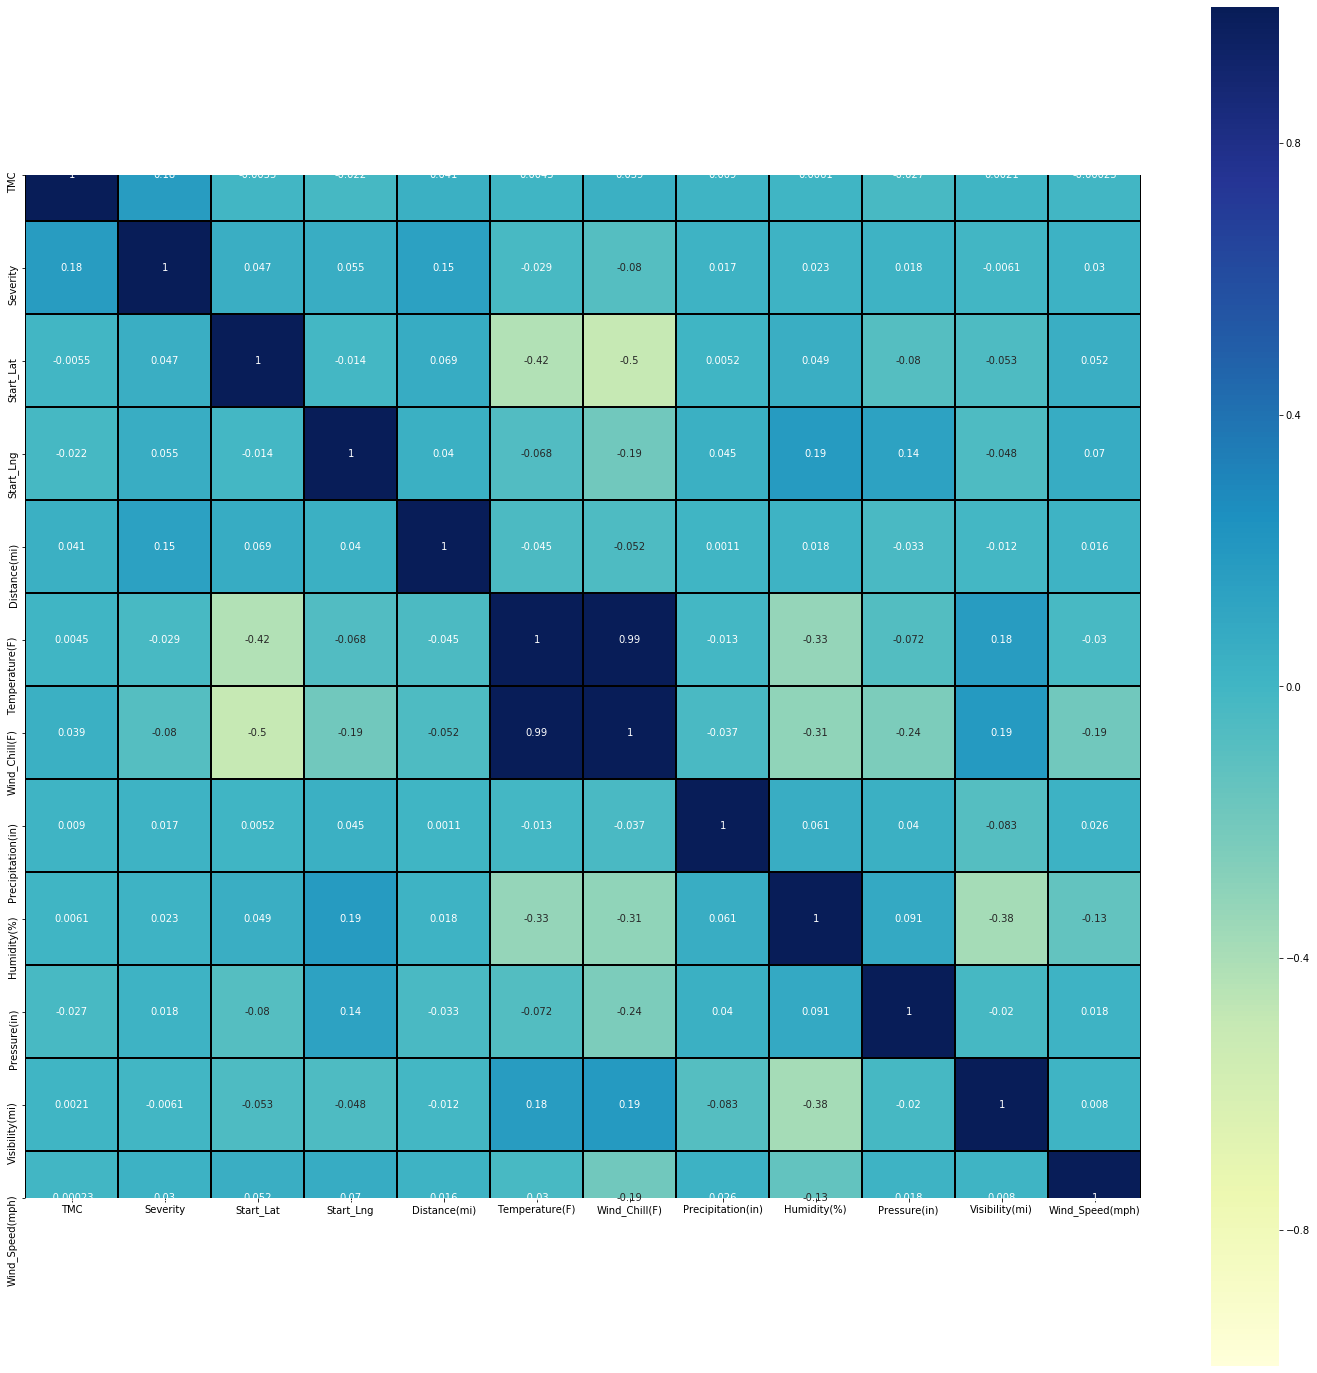

In [17]:
fig = plt.gcf()
fig.set_size_inches(25,25)
fig = sns.heatmap(df[['TMC','Severity','Start_Lat','Start_Lng','Distance(mi)','Temperature(F)',
                      'Wind_Chill(F)', 'Precipitation(in)','Humidity(%)','Pressure(in)','Visibility(mi)',
                      'Wind_Speed(mph)']].corr(),annot=True,
            cmap='YlGnBu',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1,vmax=1,
            cbar_kws={"orientation": "vertical"},cbar=True)
#issue with version creates plot cutoff 

Text(0.5, 1.0, 'Accident Severity Records Distribution')

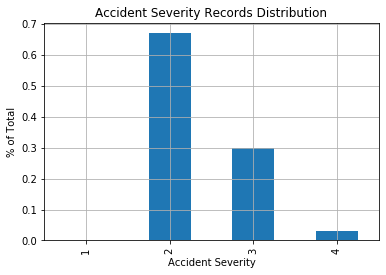

In [18]:
df.Severity.value_counts(normalize=True).sort_index().plot.bar()
plt.grid()
plt.xlabel('Accident Severity')
plt.ylabel('% of Total')
plt.title('Accident Severity Records Distribution')

The accident severity scale runs from 1 (lowest) to 4 (highest). There are no observed records for a severity classification of 1 so this indicates that we are dealing with medium to severe type accidents or classes 2/3/4

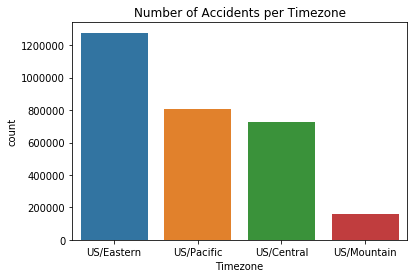

In [19]:
sns.countplot('Timezone', data=df,order=df['Timezone'].value_counts().index)
plt.title('Number of Accidents per Timezone')
plt.show()

This analysis of accident frequency is interesting because it reveals that nearly half of the accidents recorded in the dataset are occuring in the Eastern time zone of the US, while Mountain time zone accounts for a fraction of the records.This will assist with deciding on what state to select for accident prediction later on in this notebook. 

In [12]:
#start_time = pd.to_datetime(df.Start_Time,format='%Y-%m-%d %H:%M:%S', errors='coerce')
#end_time = pd.to_datetime(df.End_Time,  format='%Y-%m-%d %H:%M:%S', errors='coerce')
#accident_dur  = (end_time-start_time)

In [20]:
#formatting the datetime field in the dataset to assist in creating a new column 
df['start_time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['end_time'] = pd.to_datetime(df['End_Time'], errors='coerce')
df['year']=df['start_time'].dt.year
df['month']=df['start_time'].dt.strftime('%b')
df['day']=df['start_time'].dt.day
df['hour']=df['start_time'].dt.hour
df['weekday']=df['start_time'].dt.strftime('%a')
#adding a new field to the data in the time duration of accidents
accident_dur='accident_dur(min)'
df[accident_dur]=round((df['end_time']-df['start_time'])/np.timedelta64(1,'m'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 57 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               object
End_Time                 object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi

In [21]:
#checking that the accident_dur column added to the dataframe was properly formated
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Nautical_Twilight,Astronomical_Twilight,start_time,end_time,year,month,day,hour,weekday,accident_dur(min)
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,Night,Night,2016-02-08 05:46:00,2016-02-08 11:00:00,2016,Feb,8,5,Mon,314.0
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,Night,Day,2016-02-08 06:07:59,2016-02-08 06:37:59,2016,Feb,8,6,Mon,30.0
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,Day,Day,2016-02-08 06:49:27,2016-02-08 07:19:27,2016,Feb,8,6,Mon,30.0
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,Day,Day,2016-02-08 07:23:34,2016-02-08 07:53:34,2016,Feb,8,7,Mon,30.0
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,Day,Day,2016-02-08 07:39:07,2016-02-08 08:09:07,2016,Feb,8,7,Mon,30.0


Text(0.5, 1.0, 'Top 5 Accident Lengths by Frequency')

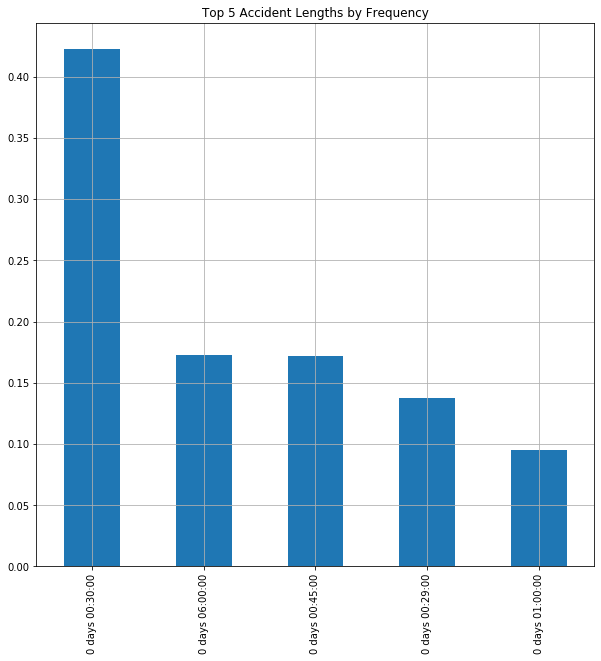

In [23]:
duration_freq = df['accident_dur(min)'].astype('timedelta64[m]').value_counts().nlargest(5)
(duration_freq/duration_freq.sum()).plot.bar(figsize=(10,10))
plt.grid()
plt.title('Top 5 Accident Lengths by Frequency')

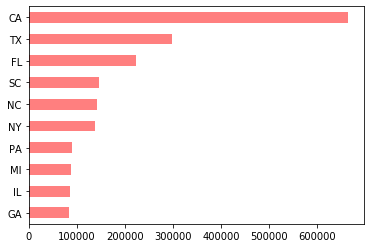

In [24]:
df.State.value_counts().sort_values(ascending=False)[:10].sort_values().plot(
    kind='barh',color='red', alpha=0.5)

The top 5 states for accidents are California, Texas, Florida, South Carolina, and North Carolina. At least for this dataset, there is no geographic location that has a higher accident frequency that is discernible in comparison to another, even if three states from the same area are here 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

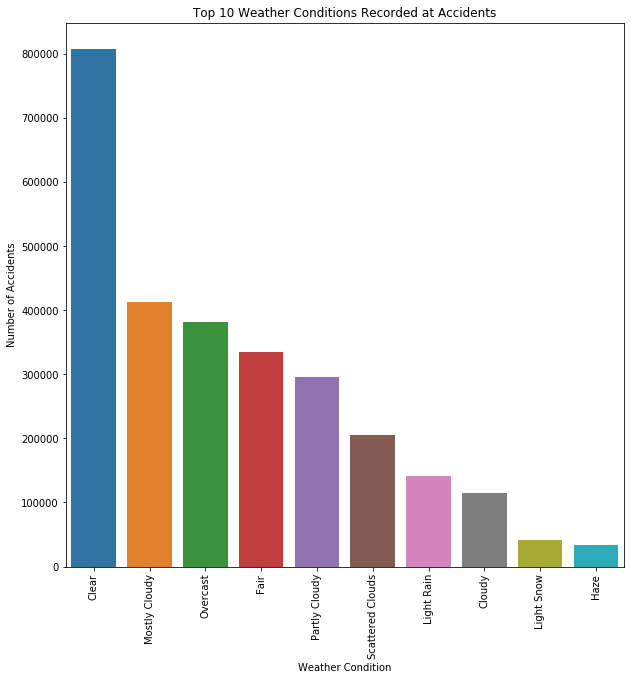

In [25]:
plt.figure(figsize=(10,10))
sns.countplot('Weather_Condition', data=df, order=df['Weather_Condition'].value_counts().nlargest(10).index)
plt.title('Top 10 Weather Conditions Recorded at Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('Weather Condition')
plt.xticks(rotation=90)

While inclement weather conditions certainly play a role in the cause of an accident, it appears that the vast majority of accidents occur when driving conditions are at or near optimal. This visualization is helpful in that it describes the distribution of accidents given specific weather conditions at the time and also in that it helps to address some of the questions that arose when I was analyzing the missing data. The variables with the most missing values were all weather related, this indicates it is because the majority of accidents are occuring in clear or cloudy skies

# Pre-Modeling & Subsetting

In [26]:
#I am prepping to model the dataset and am dropping "extreme" (negative) accident duration values for this purpose
outliers=df[accident_dur]<=0
df[outliers] = np.nan
df.dropna(subset=[accident_dur], axis=0, inplace=True)

In [28]:
#subsetting the original df to include only the variables desired for prediction 
df1 = df[['Source','TMC','Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County','State',
             'Timezone','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
             'Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout',
             'Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset', 
             'accident_dur(min)']].copy()
df1.head()

,Source,TMC,Severity,Start_Lng,Start_Lat,Distance(mi),Side,City,County,State,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,accident_dur(min)
0,MapQuest,201.0,3.0,-84.058723,39.865147,0.01,R,Dayton,Montgomery,OH,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Night,314.0
1,MapQuest,201.0,2.0,-82.831184,39.928059,0.01,L,Reynoldsburg,Franklin,OH,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Night,30.0
2,MapQuest,201.0,2.0,-84.032608,39.063148,0.01,R,Williamsburg,Clermont,OH,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Night,30.0
3,MapQuest,201.0,3.0,-84.205582,39.747753,0.01,R,Dayton,Montgomery,OH,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Night,30.0
4,MapQuest,201.0,2.0,-84.188354,39.627781,0.01,R,Dayton,Montgomery,OH,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Day,30.0


In [29]:
#As I spoke to at the beginning the dataset is too big to model all together so I am subsetting it, based on previous findings
#I am modeling with the state has the second highest frequency in this dataset in Texas (TX)
df_tx=df1.loc[df1.State=='TX'].copy()
df_tx.drop('State',axis=1, inplace=True)
df_tx

,Source,TMC,Severity,Start_Lng,Start_Lat,Distance(mi),Side,City,County,Timezone,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,accident_dur(min)
261007,MapQuest,201.0,2.0,-97.755646,30.336502,0.010,R,Austin,Travis,US/Central,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,76.0
261008,MapQuest,201.0,2.0,-97.694305,30.328165,0.000,L,Austin,Travis,US/Central,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,75.0
261009,MapQuest,201.0,2.0,-97.692307,30.326077,0.000,R,Austin,Travis,US/Central,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Day,75.0
261010,MapQuest,201.0,2.0,-97.513084,32.856014,0.010,R,Fort Worth,Tarrant,US/Central,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,80.0
261011,MapQuest,201.0,3.0,-97.212090,32.797668,0.010,R,Fort Worth,Tarrant,US/Central,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974067,Bing,NaN,2.0,-95.456110,29.749589,0.493,R,Houston,Harris,US/Central,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,29.0
2974068,Bing,NaN,3.0,-95.373146,29.778089,0.399,R,Houston,Harris,US/Central,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,30.0
2974069,Bing,NaN,3.0,-95.320940,29.774190,0.520,R,Houston,Harris,US/Central,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,30.0
2974071,Bing,NaN,3.0,-95.295187,29.941686,1.153,R,Humble,Harris,US/Central,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,27.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

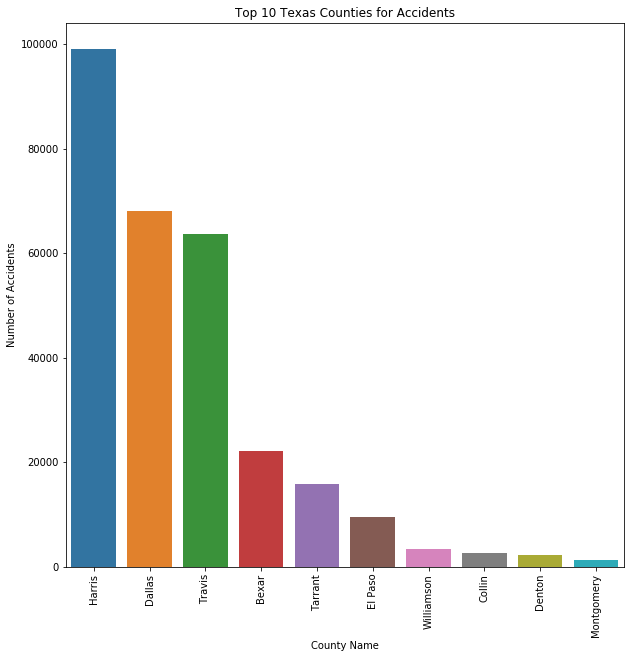

In [30]:
plt.figure(figsize=(10,10))
sns.countplot('County', data=df_tx, order=df_tx['County'].value_counts().nlargest(10).index)
plt.title('Top 10 Texas Counties for Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('County Name')
plt.xticks(rotation=90)

This visual aides in my selection of which county to select from the state because I need to balance subsetting the dataset with ensuring that there is still enough information for modeling. The top two counties, Harris and Dallas, are the two most populous counties in the state so it makes sense that we are seeing the highest value counts in these two

In [31]:
# as I spoke to I am subsetting the data further into a county specific df
df_harris=df_tx.loc[df_tx.County=='Harris'].copy()
df_harris.drop('County',axis=1, inplace=True)
df_harris

,Source,TMC,Severity,Start_Lng,Start_Lat,Distance(mi),Side,City,Timezone,Temperature(F),...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,accident_dur(min)
261018,MapQuest,201.0,2.0,-95.551613,29.716625,0.000,R,Houston,US/Central,66.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Day,81.0
261019,MapQuest,201.0,2.0,-95.403114,29.859201,0.000,R,Houston,US/Central,66.9,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Day,90.0
261020,MapQuest,201.0,2.0,-95.384483,29.845549,0.010,R,Houston,US/Central,66.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Day,60.0
261021,MapQuest,201.0,3.0,-95.374695,29.758677,0.010,R,Houston,US/Central,66.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,74.0
261025,MapQuest,201.0,3.0,-95.402122,29.731260,0.010,R,Houston,US/Central,64.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974067,Bing,NaN,2.0,-95.456110,29.749589,0.493,R,Houston,US/Central,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,29.0
2974068,Bing,NaN,3.0,-95.373146,29.778089,0.399,R,Houston,US/Central,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,30.0
2974069,Bing,NaN,3.0,-95.320940,29.774190,0.520,R,Houston,US/Central,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,30.0
2974071,Bing,NaN,3.0,-95.295187,29.941686,1.153,R,Humble,US/Central,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,27.0


In [32]:
#using pandas attribute to generate dummy variables for the numerous categorical variables within the dataset
harris = pd.get_dummies(df_harris,drop_first=True)
harris.head()

,TMC,Severity,Start_Lng,Start_Lat,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Amenity,...,Weather_Condition_Smoke,Weather_Condition_T-Storm,Weather_Condition_T-Storm / Windy,Weather_Condition_Thunder,Weather_Condition_Thunder / Windy,Weather_Condition_Thunder and Hail / Windy,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain,Sunrise_Sunset_Night
261018,201.0,2.0,-95.551613,29.716625,0.00,66.2,21.0,29.96,10.0,0.0,...,0,0,0,0,0,0,0,0,0,0
261019,201.0,2.0,-95.403114,29.859201,0.00,66.9,25.0,29.99,10.0,0.0,...,0,0,0,0,0,0,0,0,0,0
261020,201.0,2.0,-95.384483,29.845549,0.01,66.2,23.0,29.96,10.0,0.0,...,0,0,0,0,0,0,0,0,0,0
261021,201.0,3.0,-95.374695,29.758677,0.01,66.2,23.0,29.96,10.0,0.0,...,0,0,0,0,0,0,0,0,0,0
261025,201.0,3.0,-95.402122,29.731260,0.01,64.4,24.0,29.97,10.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# Accident Severity Prediction

In [33]:
#I am removing any null values from this refined dataset because the accident prediction models will cannot process these
harris.dropna(subset=harris.columns[harris.isnull().mean()!=0], how='any', axis=0, inplace=True)
harris.shape

(82945, 123)

In [34]:
#creating an object to store the target variable of accident severity
target = 'Severity'
y= harris[target]
x = harris.drop(target, axis=1)
#splitting the dataset by an 80/20 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
#creating an empty list to store accuracy measure for the below models
algorithms=['Logistic Regression',' K-Nearest Neighbors','Decision Trees','Random Forest']
accuracy = []

## Logistic Regression

In [36]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
acc=accuracy_score(y_test, y_pred)
accuracy.append(acc)
accuracy

C:\Users\rd45077\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rd45077\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[0.8554463801314124]

# K Nearest Neighbors (KNN)

In [37]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
#getting the accuracy measure
acc=accuracy_score(y_test, y_pred)
#appending the measure to the previously created list
accuracy.append(acc)
accuracy

[0.8554463801314124, 0.8254867683404665]

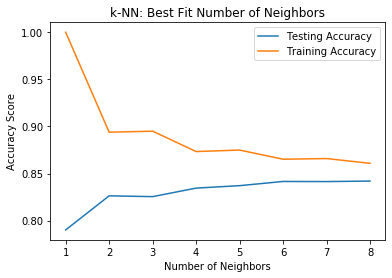

In [38]:
#instead of guessing the best fit n_neighbors I am creating a loop to identify the accuracy score and plotting them to identify
#the best value
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, n_neighbor in enumerate(neighbors):
    #fitting the knn model to iterate through the neighbors object I created above
    knn = KNeighborsClassifier(n_neighbors=n_neighbor)
    #fitting the classifier
    knn.fit(x_train,y_train)
    #calculating the accuracy on the training data
    train_accuracy[i] = knn.score(x_train, y_train)
    #calculating the accuracy on the testing data
    test_accuracy[i] = knn.score(x_test, y_test)

plt.title('k-NN: Best Fit Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.show()

## Decision Tree 

There are two types of criterion that can be employed with this classifier which are entrophy and gini. I will be running both to compare the results
   - Entrophy is used for information gain, which refers to the impurity in a group. Given this use case, I decided to begin with this criterion as opposed to the default Gini

In [40]:
dt1 = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
#fitting the classifier to the training set
dt1.fit(x_train, y_train)
#predicting class
y_pred= dt1.predict(x_test)
#calculating accuracy
entropy_accuracy = accuracy_score(y_test, y_pred)
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(entropy_accuracy))
#re-running the decision tree on the other criterion or the default option 
dt2 = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
#fitting the classifier to the training set
dt2.fit(x_train, y_train)
#predicting class
y_pred= dt2.predict(x_test)
#calculating accuracy
gini_accuracy = accuracy_score(y_test, y_pred)
#appending to the accuracy list
acc=gini_accuracy
accuracy.append(acc)
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(gini_accuracy))

[Decision Tree -- entropy] accuracy_score: 0.885.
[Decision Tree -- gini] accuracy_score: 0.885.


## Random Forest

In [41]:
clf=RandomForestClassifier(n_estimators=100)
#fitting the classifier to the training set
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
#calculating accuracy
acc=accuracy_score(y_test, y_pred)
#appending to the accuracy list
accuracy.append(acc)
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

[Randon forest algorithm] accuracy_score: 0.908.


No handles with labels found to put in legend.


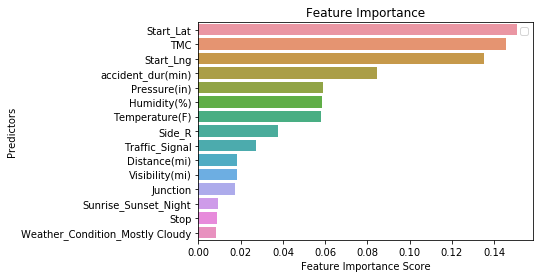

In [42]:
feature_imp = pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False)
k=15
#making a sns bar plot for most important features
sns.barplot(x=feature_imp[:15], y=feature_imp.index[:k])
plt.xlabel('Feature Importance Score')
plt.ylabel('Predictors')
plt.title("Feature Importance")
plt.legend()
plt.show()

In [43]:
#selecting features based on importance weights
sfm = SelectFromModel(clf, threshold=0.03)
sfm.fit(x_train, y_train)
feat_labels=x.columns
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

TMC
Start_Lng
Start_Lat
Temperature(F)
Humidity(%)
Pressure(in)
accident_dur(min)
Side_R


In [44]:
#training a new random forest model based on the subset of features previously created
X_important_train = sfm.transform(x_train)
X_important_test = sfm.transform(x_test)
clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [45]:
y_pred = clf.predict(x_test)
#printing the accuracy of the random forest model with all the predictors
print('[Randon forest algorithm with all features] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))
y_important_pred = clf_important.predict(X_important_test)
#comparing the accuracy of the rf model with all of them to the subset rf model
print('[Randon forest algorithm with most important features] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_important_pred)))

[Randon forest algorithm with all features] accuracy_score: 0.908.
[Randon forest algorithm with most important features] accuracy_score: 0.914.


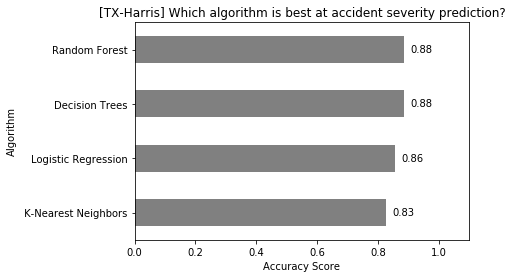

In [46]:
y_ticks=np.arange(len(algorithms))
#creating an object to store the algorithm/accuracy pairings ranking by the accuracy measure
df_acc=pd.DataFrame(list(zip(algorithms, accuracy)), columns=['Algorithm','Accuracy_Score']).sort_values(
    by=['Accuracy_Score'],ascending = True)
#plotting the algorithm/accuracy 
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.5')
for i in ax.patches:
    #adding labels
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)
plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title('[{}-{}] Which algorithm is best at accident severity prediction?'.format('TX', 'Harris'))
plt.show()

Random Forest has the best model accuracy among those used in this analysis. The rf model improves when a subset of the predictors is used with the same configuration to predict the accident severity.